In [225]:
import polars as pl
import polars.selectors as cs
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from great_tables import style, loc

In [226]:
df = pl.read_csv('Salary_Data.csv')

In [227]:
df

YearsExperience,Salary
f64,f64
1.1,39343.0
1.3,46205.0
1.5,37731.0
2.0,43525.0
2.2,39891.0
…,…
9.0,105582.0
9.5,116969.0
9.6,112635.0


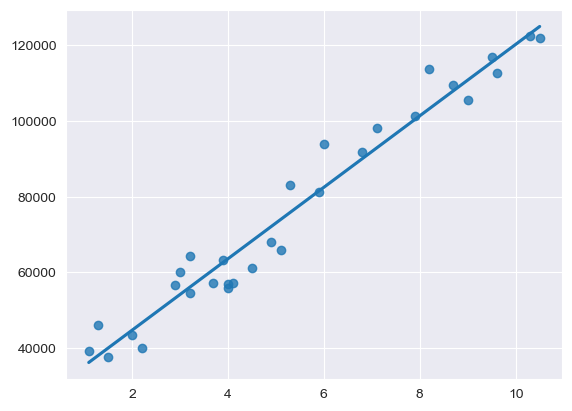

In [228]:
sns.regplot(data=df, x='YearsExperience', y='Salary', ci=None)  #
plt.show()

In [229]:
fig = px.scatter(df, x='YearsExperience', y='Salary', trendline='ols')
fig.show()

In [230]:
X = np.array(df.select(cs.exclude(['Salary'])))

In [231]:
y = np.array(df.select('Salary'))

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
scaler = StandardScaler()

In [236]:
scaled_X_train = scaler.fit_transform(X_train)

In [237]:
scaled_X_test = scaler.transform(X_test)

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
line_model = LinearRegression()

In [240]:
line_model.fit(scaled_X_train, y_train)

LinearRegression()

In [242]:
predictions = line_model.predict(scaled_X_test)

In [205]:
# predictions = [p[0] for p in predictions]

In [243]:
y_test = pl.Series('Salary', y_test)
predictions = pl.Series(predictions)

In [244]:
pl.DataFrame({
    'Actual Salary': y_test,
    'Predicted Salary': predictions,
    'Error': y_test - predictions
})

Actual Salary,Predicted Salary,Error
"array[f64, 1]","array[f64, 1]","array[f64, 1]"
[112635.0],[115790.210113],[-3155.210113]
[67938.0],[71498.278095],[-3560.278095]
[113812.0],[102596.868661],[11215.131339]
[83088.0],[75267.804224],[7820.195776]
[64445.0],[55477.792045],[8967.207955]
[57189.0],[60189.699707],[-3000.699707]


In [245]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [246]:
MSE = mean_squared_error(y_test, predictions)

In [247]:
MAE = mean_absolute_error(y_test, predictions)

In [248]:
print(f'Mean Squared Error: {MSE}' )
print(f'Mean Absolute Error: {MAE}')

Mean Squared Error: 49830096.85590834
Mean Absolute Error: 6286.453830757746


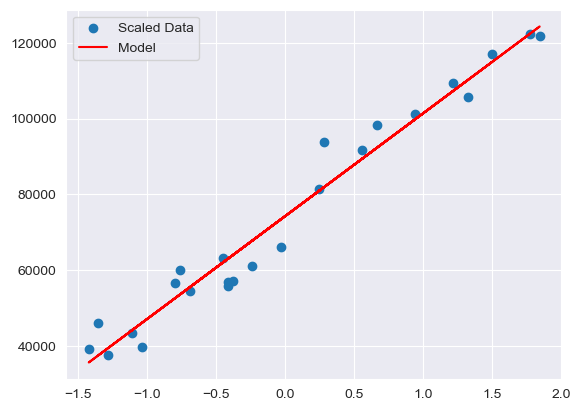

In [250]:
plt.scatter(scaled_X_train, y_train, label="Scaled Data")
plt.plot(scaled_X_train, line_model.predict(scaled_X_train), color='red', label="Model")
plt.legend()
plt.show()

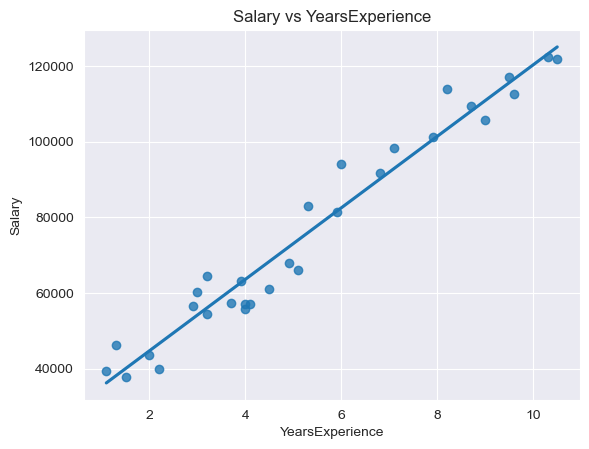

In [219]:
sns.regplot(data=df, x='YearsExperience', y='Salary', ci=None)
plt.title('Salary vs YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

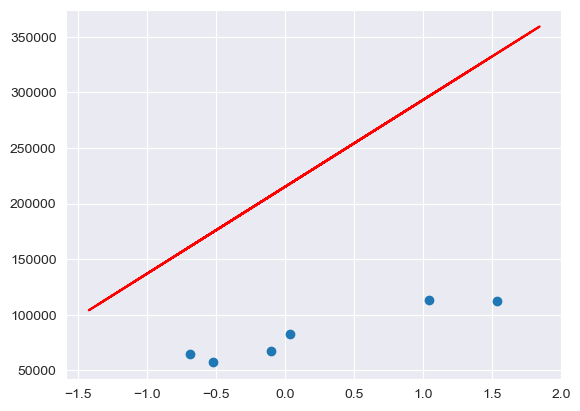

In [255]:
plt.scatter(scaled_X_test, y_test)
plt.plot(scaled_X_train, line_model.predict(X_train), color='red')
plt.show()